## ========================================================================
##  2. Pandas
### Mahdi Shafiee Kamalabad
## ========================================================================

<center>
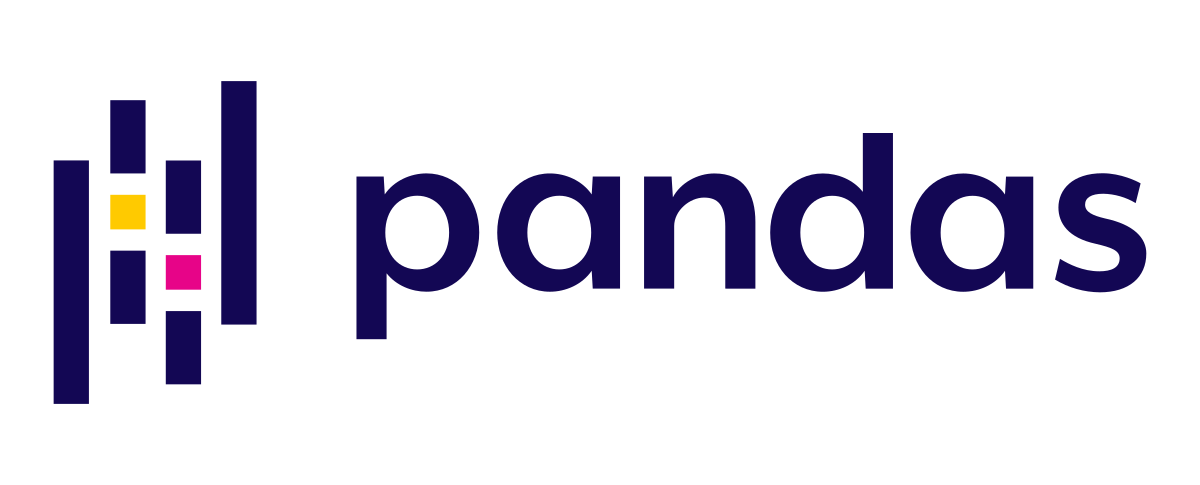
</center>


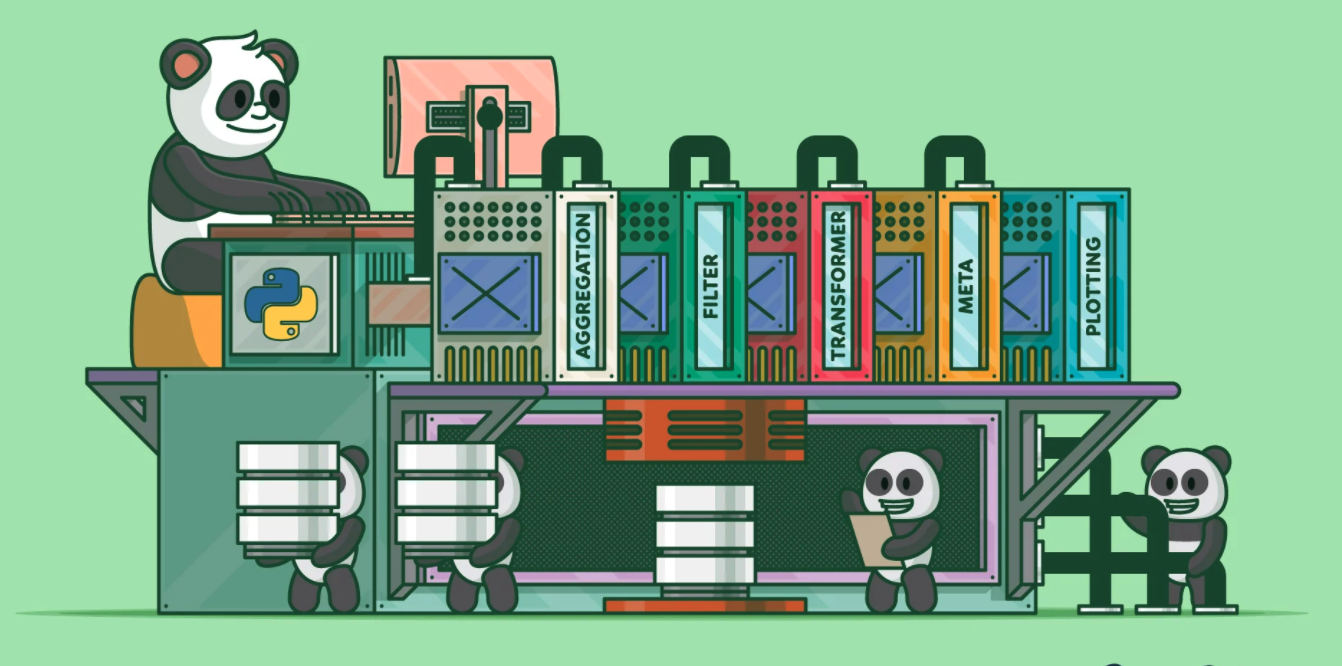

## Pandas package
* is one of the important tools for data scientists. 
* is the backbone of most data projects.


* **Pandas** is derived from the term **"panel data"**, an econometrics term for data sets that include observations over multiple time periods for the same individuals (*Wikipedia*).  


## Difference between Numpy and Pandas
* The biggest difference between Numpy and Pandas is that the former is mostly conceived to work with **homogeneous, numerical arrays**, while the latter is designed for **tabular, heterogeneous data**. 
* **Pandas tables** are similar to **Excel spreadsheets (formed by rows and columns)**, for which a great range of methods and operations are provided. 

In [ ]:
import pandas as pd 
import numpy as np

---
### 2.1 Pandas Data Structures 
The two main objects in Pandas:
* `Series` (one-dimensional sequences)
* `DataFrame` (two-dimensional arrays of heterogeneous types). 

### **Series**

The Series is composed by two objects: the **Series's values**, and an **index**.

In [ ]:
obj = pd.Series([4, 7, -5, 3])
obj 

# example with string ['e','w']

In [ ]:
obj.values
#obj.index

The index serves to identify the values (they can be seen as *labels*); indices can be given custom labels:

In [ ]:
obj = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj

In [ ]:
new_obj = pd.Series([2,3],index=[3,6])
new_obj

It is possible to generate a Series from a Python dictionary: 

In [ ]:
data = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj2 = pd.Series(data) # +1
obj2

### **DataFrame**
* DataFrames represent **tabular data**, where **each columns** can be of a **different value type**. 
* We can create a Pandas **DataFrame** from a Python **dictionary**.
* Unlike Series, the **keys** of the dictionary will represent the **column names**, rather than the index name; nevertheless, also dataframes have an index object incorporated.

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)  # D...F...
frame

We can visualize the first five rows of a DataFrame with the `head()` method: 

In [ ]:
# frame.head()

## what does .tail show?
# frame.tail()


The order of the columns can be changed according to a given sequence:

In [ ]:
pd.DataFrame(data, columns=['year', 'state', 'pop']).head()

* It is also possible to give to `DataFrame` a name for the indices.
* If a column name is given that is not in the Python dictionary, such column will appear as a sequence of *missing values*: 

In [ ]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
frame2

We can obtain the column names with the `.columns` attribute, and retrieve a single column (in which case it is returned in form of a Series):

In [ ]:
frame2.columns

In [ ]:
frame2['state']  # Equivalently: frame2.state
# another column


We can manually assign values to a column: 

In [ ]:
frame2['debt'] = np.arange(6.0)
frame2

**Note**: We can also **instantiate** a DataFrame from **Numpy arrays**:

In [ ]:
frame = pd.DataFrame(np.arange(9).reshape((3,3)), 
                    index=['a','c','d'], 
                    columns=['Ohio', 'Texas', 'California'])
frame

---
### 2.2 Main Functionalities 

**Dropping entries from an axis**. It is possible to drop values from an existing axis. In the case of Series, this is the **Series index**: 

In [ ]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

In [ ]:
# Let's drop the values indexed 'd' and 'c': 
obj.drop(['d', 'c'])     # name_data.drop([])


We can delete index values in **DataFrames** from **both axes**. 

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

# See the numpy array here.

In [ ]:
# Drop two rows (notice that index names are in a Python list): 
data.drop(['Colorado', 'Ohio'],axis=0) # the default is also axis=0, that is, the default is row.
# data.drop('Colorado')

In [ ]:
# Drop two columns: 
data.drop(['two','four'], axis=1)

The **object** is **not** modified **in-place** if we call "data" again: 

The modification can occur in-place by setting to True the specific argument: 

In [ ]:
data.drop('Ohio', inplace=True)
data

### **Indexing, Slicing, Filtering**

Indexing occurs in a **similar manner** to what we have seen for Numpy arrays. The **difference** is that you **can** also perform it with the **index names**. 

In [ ]:
obj = pd.Series(np.arange(4.)+10, index=['a', 'b', 'c', 'd'])
obj

In [ ]:
obj[2:4]
# obj['c':'d']

In [ ]:
obj[['b', 'a', 'd']]

In [ ]:
obj[[1, 3]]

In [ ]:
# Get only values smaller than two: 
obj[obj < 12]

In DataFrames, indexing names select columns:

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

In [ ]:
data[['three', 'one']]
# data[['Ohio', 'Colorado']]  # error: "None of [Index(['Ohio', 'Colorado'], dtype='object')] are in the [columns]"
# data[1:4]  # operate on rows

You can select the first two rows of the DataFrame in this way:

In [ ]:
data[:2]

It is possible to filter data with a boolean array:

In [ ]:
data['three'] > 5

A comparison by scalar yields a boolean DataFrame: 

In [ ]:
data < 5

In [ ]:
# Let's assign 0 to all values smaller than 5
data[data<5] = 0
data

### **loc and iloc**

* With `loc` we can perform selection by **axis labels**.
* With `iloc` we can perform selection by **integers**. 

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

In [ ]:
data.loc[['Ohio','Colorado'], ['two', 'three']]

In [ ]:
data.iloc[[0,1], [1, 2]]

In [ ]:
# A single integer select the corresponding row
data.iloc[2]

In [ ]:
## In short:
## row
# data.iloc[0] # first row of data frame  - Note a Series data type output.
#data.iloc[1] # second row of data frame
#data.iloc[-1] # last row of data frame 
## Columns:
#data.iloc[:,0] # first column of data frame 
#data.iloc[:,1] # second column of data frame 
# data.iloc[:,-1] # last column of data frame 

---
### 2.3 Descriptive Statistics
Pandas allows computing summary statistics on Series and DataFrame's; these include sums, cumulative sums, means, etc.  

In [ ]:
# DataFrame with some missing values (denoted by NaN)
df = pd.DataFrame([[1.4, np.nan,np.nan], [7.1, -4.5,2.1],
                   [np.nan, np.nan], [0.75, -1.3,np.nan],],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two','three'])
df

**Univariate Descriptive Statistics**. 

In [ ]:
# Column sums (by default, missing values are ignored)
df.sum()

In [ ]:
# Row sums
df.sum(axis='columns')    # or axis=1

`describe` prodcues **multiple summary statistics** of the DataFrame, such as sample size, mean, standard deviations, quartiles, and min/max:

In [ ]:
df.describe()


#what is the output of the following? try to explore it yourself

#df1= df.describe(include="all")
#df1.loc['dtype'] = df.dtypes
#df1.loc['size'] = len(df)
#df1.loc['% count'] = df.isnull().mean()
#print (df1)


For non-numeric data, `describe` computes the mode (and its frequency):

In [ ]:
obj = pd.Series(['a', 'a','a', 'b', 'c'] * 4)
obj.describe()

There are several others univariate descriptive statistics that can be computed; you can find a list of them in the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats).

**Correlation and Covariance**

We can also **calculate  correlations and covariances** among columns. Let's first create a DataFrame with $n=100$ observations and four variables, two correlated and two uncorrelated ones. For this, we will use the Numpy library. 

In [ ]:
import pandas as pd 
# import numpy as np
# Setting the random seed means that your work is reproducible to others who use your code. 
np.random.seed(1) 
# Three uncorrelated normal variables 
X = np.random.randn(100,3)  # from Normal dist.
X

In [ ]:
# Create a fourth variable, correlated to the third one: 
new_x = X[:,2] * 5 + np.random.randn(100)
# Let's put everything in a DataFrame
# hstack: Stack arrays in sequence horizontally (column wise).
data = pd.DataFrame(np.hstack((X,new_x.reshape((100,1)))), columns=['A','B','C','D'])
data.head()

Now, let's calculate the correlation between A and C, and between C and D: 

In [ ]:
data['A'].corr(data['C']) # data[name of first column of interest].corr[second column of interest]

In [ ]:
data['C'].corr(data['D']) ## Note that D was made from C. So we expect a high correlation.

Similarly, we can obtain covariances: 

In [ ]:
data['A'].cov(data['C'])

In [ ]:
data['C'].cov(data['D'])

When applied to the whole DataFrame, rather than to Series, we obtain correlation and covariance matrices: 

In [ ]:
# Correlation matrix:
data.corr()

In [ ]:
# Covariance matrix (variances in the diagonal): 
data.cov()

**Unique values, counts, membership**

`unique` returns the unique elements, while `value_counts()` counts the number of appearances of such values.

In [ ]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
# Obtain unique values in the Series
uniques = obj.unique()
uniques

In [ ]:
# Count how many times each object appears
obj.value_counts()

**Scatter matrix** 
* Pandas has also a `plotting` module which allows for data visualization. 
* Let's use it to represent a **scatterplot matrix**, which represents the column vs. column bivariate plots in the off-diagonals, and the columns histograms in the diagonal. 

In [ ]:
np.random.seed(1)
# Three uncorrelated normal variables 
X = np.random.randn(100,3)
# Create a fourth variable, correlated to the third one: 
new_x = X[:,2] * 5 + np.random.randn(100)
# Let's put everything in a DataFrame
data = pd.DataFrame(np.hstack((X,new_x.reshape((100,1)))), columns=['A','B','C','D'])
data.head()


In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
# alpha regulates the transparency
scatter_matrix(data, figsize=(5,5),alpha=0.5)
plt.show()

## Note: If Matplotlib is used in a terminal or scripts, plt.show() is a must. 
## if it is used in a notebook plt.show() is unnecessary.

---
### 2.4 Importing/Exporting files
With Pandas, we can **import/export files** in form of Pandas objects. Here, we will see how to do this with `csv` files. For more information about what formats are supported, you can see the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

Let's start by exporting the DataFrame just created in `csv` format into the "data" folder; the file will be called 'pandas_test.csv'. 

In [ ]:
# To get the current working directory use
import os
cwd = os.getcwd()
cwd

In [ ]:
data

In [ ]:
# Export `data` into data/pandas_test.csv with to_csv: 
data.to_csv('/Users/shafi004/Desktop/UU_COURSE/winterschool/Python/version03_2022_Python/006- NUMPY-PANDAS_Matplotlib/MYpandas.csv', index_label=False)

You can assess in the 'data' folder that the file has been created. We do it here with the `os` library:

In [ ]:
import os 
os.listdir("/Users/shafi004/Desktop/UU_COURSE/winterschool/Python/version03_2022_Python/006- NUMPY-PANDAS_Matplotlib") 

Let's now import the 'pandas_test.csv' file as a DataFrame called 'imported_test': 

In [ ]:
# Impoort csv files with read_csv:
imported_test = pd.read_csv("/Users/shafi004/Desktop/UU_COURSE/winterschool/Python/version03_2022_Python/006- NUMPY-PANDAS_Matplotlib/pandas.csv")
imported_test.head()

---
### 2.5 Pandas dtypes
Pandas Series and DataFrame's columns inherit the Numpy data types (`dtypes`). For more details, you can see e.g. [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html). You can query the specifiy types with the `dtypes` attribute: 



In [ ]:
data.dtypes

In [ ]:
pd.Series([1,2,3]).dtypes

Strings (and thus categorical objects) are identified as *objects* ('O' stands for "objects"):  

In [ ]:
pd.Series(['a','b','c']).dtypes

The `astype` method can be used to convert dtypes:

In [ ]:
data.astype('int').head() # Becareful when use astype for converting float to int

In [ ]:
pd.Series([1,2,3]).astype('float32')

Strings can be converted into a `category` dtype: 

---
# For interested students

### 2.6 Missing Values
In Pandas, missing values are denoted with `NaN` (not a number, `np.nan` in Numpy). Pandas has special methods dedicated to missing values.

`isnull` can be used to detect missing values: 

In [ ]:
string_data = pd.Series(['apples','artichokes',np.nan,'avocado'])
string_data.isnull()
# string_data

In [ ]:
# How many missing values in the Series?
string_data.isnull().sum()

Beside np.nan, the Python `None` value can also be used to indicate missing values: 

In [ ]:
string_data[0] = None
string_data.isnull()

**Dropping missing data**

It is possible to filter out missing values with the `dropna` method. Here, we see an example with a DataFrame:

In [ ]:
from numpy import nan as NA
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [None, None, NA], [NA, 6.5, 3.]])
data

In [ ]:
cleaned = data.dropna()
cleaned

In [ ]:
# Drop only rows that are completely NA's: 
data.dropna(how='all')

In [ ]:
# Drop only columns that are completely NA's: 
data[3] = NA
data

In [ ]:
data.dropna(how='all', axis=1)

**Filling missing data (known as imputation in statistics)**

An alternative to dropping missing values, is to replace them. (This operation is known as *imputation* in statistics;  `scikit-learn` has specific functions dedicated to data imputation).

A way to do this is to replace them with a specific value with the `fillna` method: 

In [ ]:
data.fillna(0)

It is possible to specify a different value for each column: 

In [ ]:
data.fillna({1:0.5,2:0,3:1005}) # dictionary

---
### 2.7 Data Transformations 
**Discretization and Binning**. "Discretization" is the act of converting numeric values into labels/integers; "binning" is a way to achieve this: it is the act of assigning continuous numbers to different bins. This can be achieved with the `cut` function, which takes the object to be converted and the binning values as input arguments; the returned object is a Categorical object:

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

You can observe the new labels with the `codes` attribute, and the created categories with `categories`: 

In [ ]:
cats.categories

In [ ]:
cats.codes

In [ ]:
pd.value_counts(cats)

By passing an integers instead of an array, equal-length bins will be created:

In [ ]:
cats2 = pd.cut(ages, 4)
pd.value_counts(cats2)

Alternatively, `qcut` bins the data based on quantiles. Here, we will split a Numpy array into four quartiles: 

In [ ]:
import pandas as pd 

In [ ]:
data = np.random.randn(100)
cats = pd.qcut(data,4) ## change 4 for different quartiles
pd.value_counts(cats)

**Permutations and Random Sampling**. By using the `permutation` function (from the `numpy.random` module) in combination with the `iloc` function we can *permute* the entries of a Pandas object:

In [ ]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5,4)))
df

In [ ]:
np.random.seed(1)
permuted_indices = np.random.permutation(5)
df.iloc[permuted_indices]
# permuted_indices # e.g. array([2, 1, 4, 0, 3])

It is also possible to use the Pandas `sample` method for subsampling without replacement...

In [ ]:
# Note: random_state sets the seed of the random number generator in Pandas
df.sample(n=3, random_state=1)

...and with replacement:

In [ ]:
df.sample(n=3, replace=True, random_state=12)

**Creating Dummy variables**. Dummy variables are an alternative way to represent categorical data. Variables with 'k' distinct values will be replaced by 'k' variables, equal to 1 whenever the row instance has the original variable equal to the reference value of the new variable, and 0 otherwise. As we will see, this method is also known as One-Hot encoding in Machine Learning: `scikit-learn` also offers a functionality that allows converting categorical variables to one-hot encoded ones. 

In Pandas, the function that allows perform one-hot encoding is `get_dummies`. 

In [ ]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
df

In [ ]:
# Dummy variables for the 'key' column:
pd.get_dummies(df['key'])

Let's now replace 'key' in the original dataset, including the dummy names in the columns: 

In [ ]:
dummies = pd.get_dummies(df['key'], prefix='key')
dummies

In [ ]:
# dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df.drop('key', axis=1).join(dummies)
df_with_dummy

---
### 2.8 Hierarchical Indexing
Pandas objects can share more than one index within each axis. Here's an example with a Series. 

In [ ]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

In [ ]:
data.index

In [ ]:
# Select data by first index
data['b']

In [ ]:
# Slice by first index
data['b':'c']

In [ ]:
# Select by second index
data.loc[:,2]

In [ ]:
data

The `unstack` method can be used to rearrange data (one axis per index): 

In [ ]:
data.unstack()

**Summary Statistics by level**. You can calculate summary statistics, aggregated by the desired axis level. 

In [ ]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

In [ ]:
# frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                    # index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                    # columns=[['Ohio', 'Ohio', 'Colorado'],
                    #          ['Green', 'Red', 'Green']])
# Name the indexes:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

In [ ]:
frame['Ohio']

In [ ]:
frame['Colorado']

In [ ]:
frame

In [ ]:
# Sum of values by key2 
frame.sum(level='key2')

In [ ]:
# Sum of values by color
frame.sum(level='color', axis=1)

---
### 2.9 Combining and Merging DataFrames
`merge` links the rows of two datasets by using one or more keys. This recalls the "join" operation of the SQL language, which is used for relational databases. 

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df1

In [ ]:
df2

In [ ]:
pd.merge(df1,df2)

In this case, Pandas uses matching column names to decide onto which column to join. It is also possible to make the key explicit:

In [ ]:
pd.merge(df1,df2, on='key')

If two objects have different column names, we can specify them: 

In [ ]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

In [ ]:
df3

In [ ]:
df4

Values 'c' and 'd' have been dropped by `merge`; this is because by default, an inner join is performed. It is also possible to specify left, right, and outer joins:

In [ ]:
pd.merge(df3,df4, left_on='lkey', right_on='rkey',how='outer')

You can also perform a join by multiple column names: 

In [ ]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})


In [ ]:
left

In [ ]:
right

In [ ]:
pd.merge(left, right, on=['key1', 'key2'])

It is also possible to merge by index with the `left_index` and/or `right_index` argument.  

In [ ]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
left1

In [ ]:
right1

In [ ]:
pd.merge(left1, right1, left_on='key', right_index=True)

**left_on**: label or list, or array-like

Column or index level names to join on in the left DataFrame. Can also be an array or list of arrays of the length of the left DataFrame. These arrays are treated as if they are columns.

**right_on**: label or list, or array-like

Column or index level names to join on in the right DataFrame. Can also be an array or list of arrays of the length of the right DataFrame. These arrays are treated as if they are columns.

**left_index**: bool, default False

Use the index from the left DataFrame as the join key(s). If it is a MultiIndex, the number of keys in the other DataFrame (either the index or a number of columns) must match the number of levels.

**right_index**: bool, default False

Use the index from the right DataFrame as the join key. Same caveats as left_index.
See [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) for more information.

In [ ]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})
df1

**Concatenation**. `concat` allows for merging along an axis: 

In [ ]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])
pd.concat([s1, s2, s3])

In [ ]:
pd.concat([s1, s2, s3], axis=1, sort=True)

`concat` also allows performing inner joins:

In [ ]:
s4 = pd.concat([s1,s3])
s4

In [ ]:
pd.concat([s1,s4], axis=1, join='inner')

There are other functions in Pandas that allow for the merging and reshaping of dataset; among them we have: 
* [`stack` and `unstack`](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-by-stacking-and-unstacking)to rotate from data columns to rows (and undo this operation)
* [`pivot`](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects) and [`melt`](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-by-melt) to transform datasets from "long" to "wide" format (and vice versa)

---
## 2.10 Aggregated Data
Pandas allows calculating summary statistics, aggregated by the values of a (categorical) column in the DataFrame. In particular, (1) data are  split into groups, given by a specific key; (2) group-specific statistics are calculated, and returned in the aggregated form. The method that allows performing such operation is `groupby`. For example, we are now going to calculate the mean of a variable called 'data1', aggregated by a variable called 'key1'.  

In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

In [ ]:
# Group values of 'data1' by the values of 'key1'
grouped = df['data1'].groupby(df['key1'])
# Calculate aggregated means

grouped.mean()


This can be equivalently computed with: 

In [ ]:
g = df.groupby(["key1"]).data1
g.mean()

It is also possible to pass several keys: 

In [ ]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

In [ ]:
# For better visualization, we can unstack the two indexes:
means.unstack()

We can also group values of multiple columns, or of an entire DataFrame:

In [ ]:
df

In [ ]:
df.groupby(['key1', 'key2']).mean()

We can also observe group-specific sample sizes:

In [ ]:
df.groupby(['key1', 'key2']).size()

There are several functions that can be computed with grouped data: count, sum, mean, median, std, quantile, and so on. An overall summary of the key statistics is given by `describe`: 

In [ ]:
df.groupby(['key1']).describe()

It is also possible to fill missing entries with group specific values. To do this, we pass the `mean` function as argument of `fillna`, in combination with `apply`. (Note: in the following example, we use an external Python list as grouping variable. This is perfectly legitimate.)  

In [ ]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data

In [ ]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data


In [ ]:
data.groupby(group_key).mean()

In [ ]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)